# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    dbscan = DBSCAN(eps=7, min_samples=k)
    cluster_labels = dbscan.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

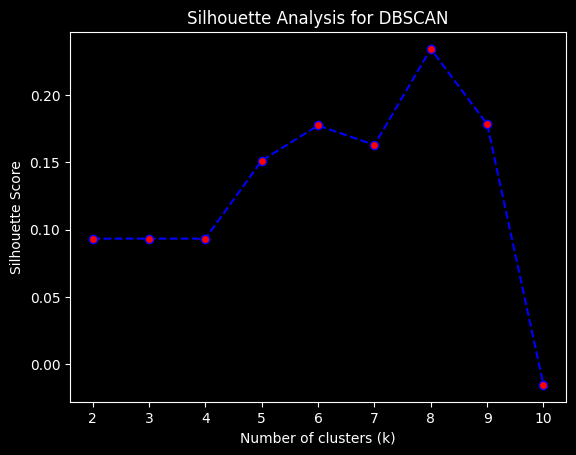

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for DBSCAN")
plt.show()

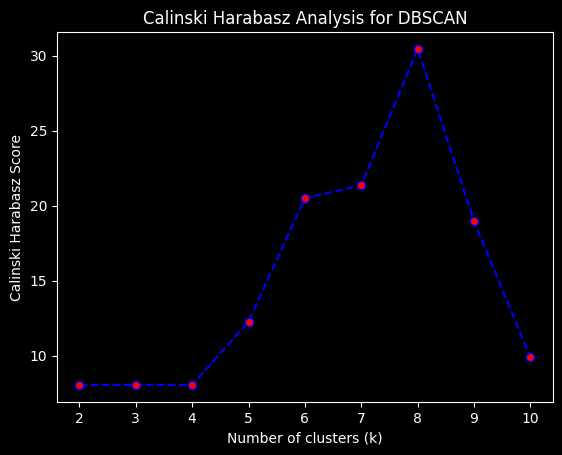

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for DBSCAN")
plt.show()

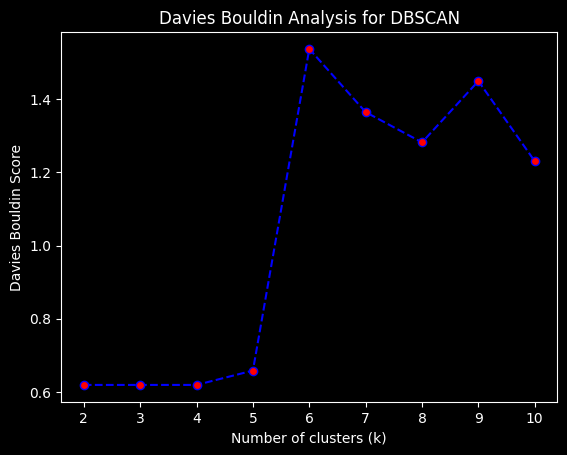

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for DBSCAN")
plt.show()

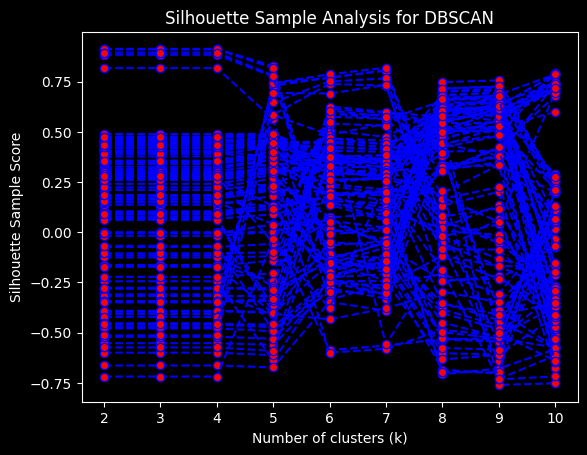

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for DBSCAN")
plt.show()

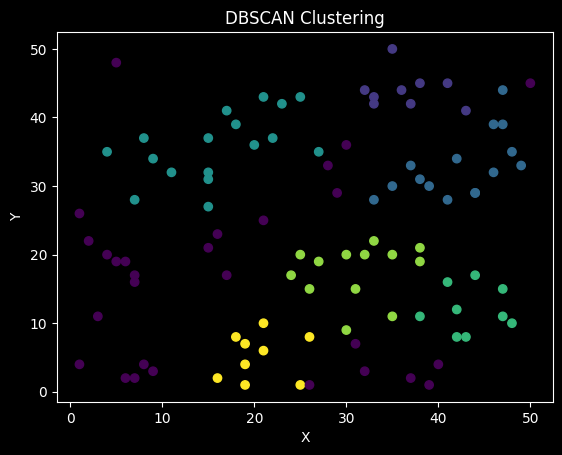

In [8]:
dbscan = DBSCAN(eps=7, min_samples=8)
cluster_labels = dbscan.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("DBSCAN Clustering")
plt.show()

In [9]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : 0.23434671180160938
Calinski Harabasz Score : 30.44970010643441
Davies Bouldin Score : 1.282164880499307
Silhouette Samples : [ 0.66243355  0.65960454  0.61831332  0.40135064  0.68453798 -0.0921517
 -0.70708168  0.70061127  0.02300262 -0.20866347  0.48412769  0.65259721
  0.60005065 -0.38429143 -0.02042132  0.61053546  0.62377005 -0.53422312
  0.17299498  0.70259222  0.5773538   0.52114009 -0.53187368 -0.24418294
  0.60598875  0.46990164  0.13263371 -0.52682743  0.00852325  0.58647558
  0.30486998  0.6279232   0.3808147   0.4549794  -0.06039969  0.71584018
  0.30967384  0.60817606  0.61437095  0.56274136  0.1944998   0.74721927
 -0.35312405  0.32011373  0.05523639  0.54249167 -0.68427475  0.43023258
  0.42208853  0.71504399  0.47793305  0.54593938  0.5053254   0.39509501
  0.63432727 -0.18857969  0.05696854  0.6702367   0.51373488  0.44032315
  0.30856467  0.6787381  -0.29582128  0.50884679  0.64729123 -0.69559535
  0.33235041  0.32281456  0.6049752  -0.48626699  0.5

In [10]:
dump(dbscan, "../../../Models/DBSCAN.joblib")

['../../../Models/DBSCAN.joblib']